# import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV,
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import graphviz
import gc

# **Data Load(결측 안채움)**

In [ ]:
df_final = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataAnalytics/data/drop_data.csv')
df_final

,hadm_id,anchor_age,drg_severity,% Hemoglobin A1c,24 hr Creatinine,25-OH Vitamin D,ARCH-1,Absolute Basophil Count,Absolute CD3 Count,Absolute CD8 Count,...,los_4,admission_los_1,admission_los_2,admission_los_3,admission_los_4,edr_los_1,edr_los_2,edr_los_3,edr_los_4,hospital_expire_flag
0,24067979,33,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
1,24067979,33,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
2,24067979,33,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
3,24459786,70,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0
4,24459786,70,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110798,25138318,43,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,1,0,0,0,0
1110799,25138318,43,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,1,0,0,0,0
1110800,24338797,50,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0
1110801,24338797,50,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
df_null = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataAnalytics/data/merged_null.csv')

In [ ]:
num_col = ["los", "admission_los", "trans_los", "edr_los"]
df_null[num_col] = np.sqrt(df_null[num_col])

In [ ]:
df_null[num_col].isnull().sum()

los                0
admission_los    130
trans_los          0
edr_los            3
dtype: int64

In [ ]:
# "admission_los" 열에서 결측값을 제거
df_null = df_null.dropna(subset=["admission_los", "edr_los"])

# **Data Load(결측 채움)**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataAnalytics/data/merged.csv')

In [ ]:
df["hospital_expire_flag"].value_counts()

0    1125796
1      45120
Name: hospital_expire_flag, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170916 entries, 0 to 1170915
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   admission_type        1170916 non-null  object 
 1   admission_location    1170916 non-null  object 
 2   insurance             1170916 non-null  object 
 3   marital_status        1170916 non-null  object 
 4   ethnicity             1170916 non-null  object 
 5   hospital_expire_flag  1170916 non-null  int64  
 6   gender                1170916 non-null  object 
 7   anchor_age            1170916 non-null  int64  
 8   anchor_year           1170916 non-null  int64  
 9   anchor_year_group     1170916 non-null  object 
 10  los                   1170916 non-null  float64
 11  eventtype             1170916 non-null  object 
 12  drg_type              1170916 non-null  object 
 13  drg_code              1170916 non-null  int64  
 14  drg_severity          1170916 non-

# **EDA**

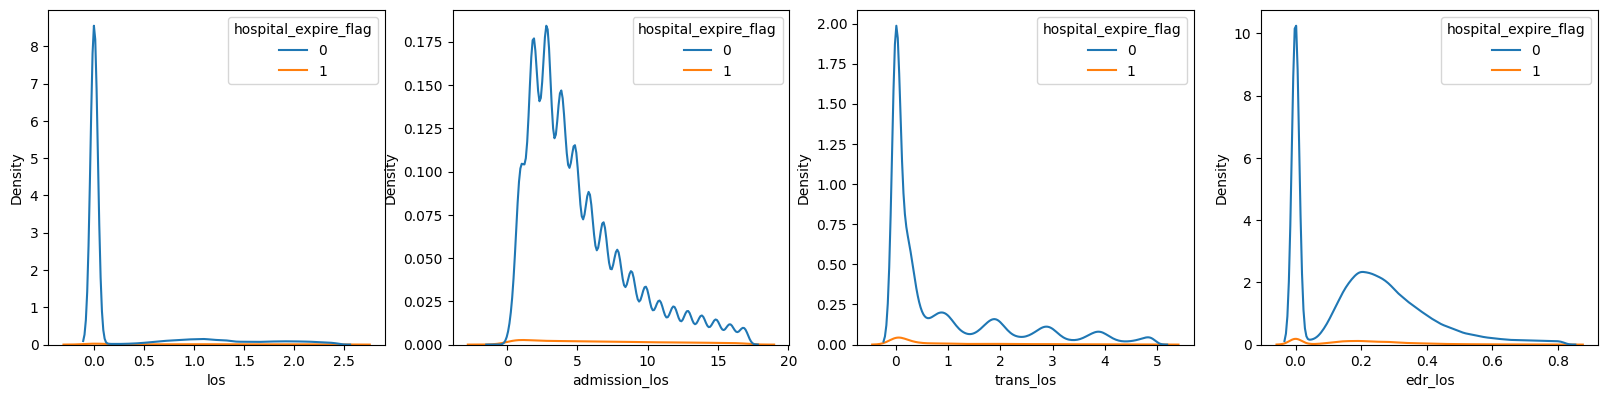

In [ ]:
num_col = ["los", "admission_los", "trans_los", "edr_los"]

plt.figure(figsize=(20, 20))

for i in range(len(num_col)):
    # 이상치 제거
    Q1 = df[num_col[i]].quantile(0.25)
    Q3 = df[num_col[i]].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = df[(df[num_col[i]] >= lower_bound) & (df[num_col[i]] <= upper_bound)]

    plt.subplot(4, 4, i+1)
    sns.kdeplot(x=num_col[i], data=filtered_data, hue="hospital_expire_flag")

plt.show()

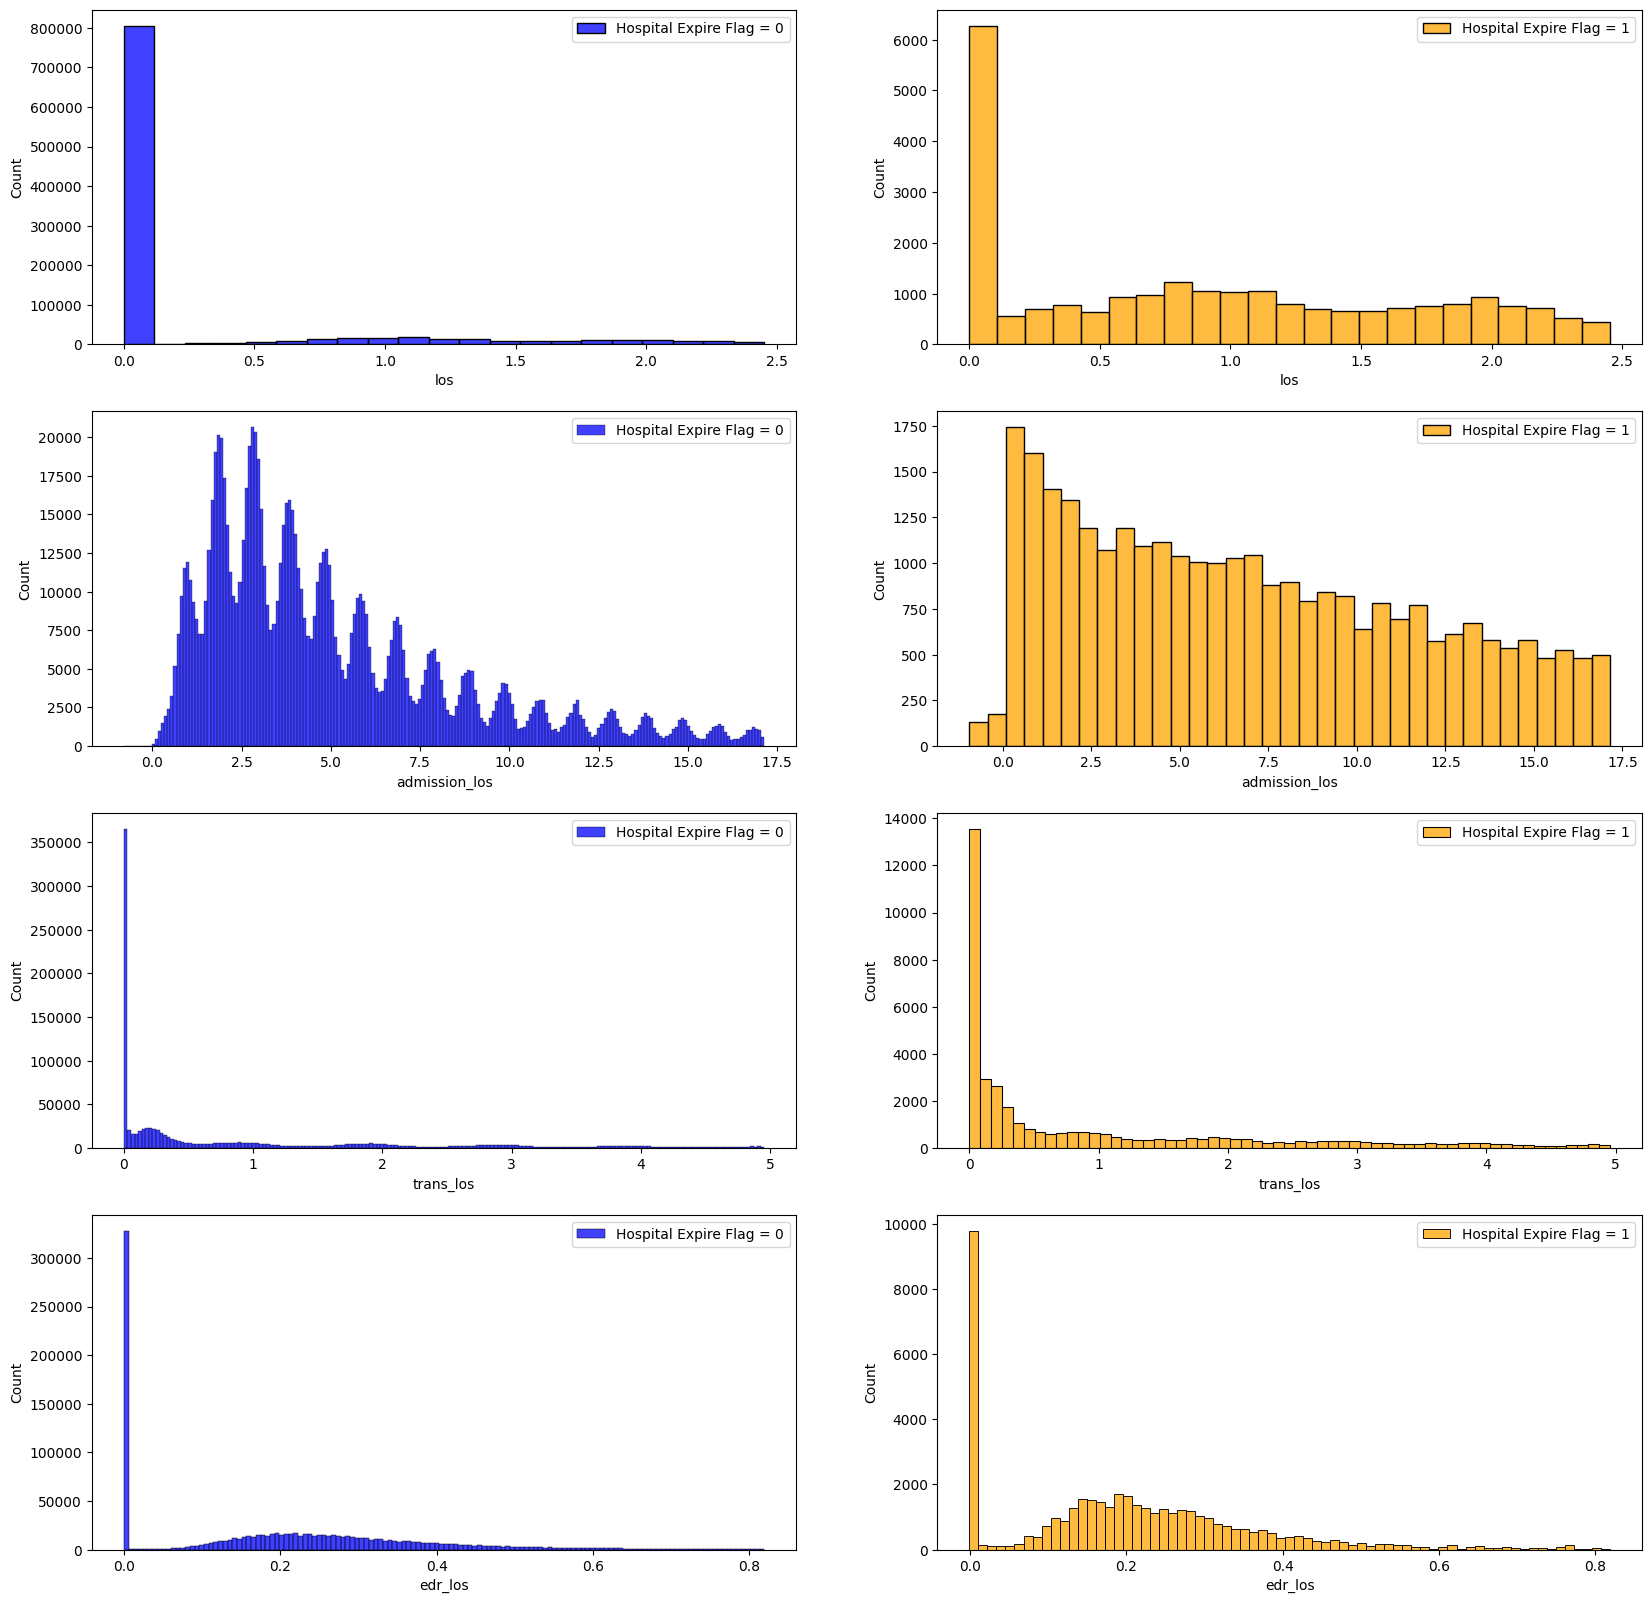

In [ ]:
num_col = ["los", "admission_los", "trans_los", "edr_los"]

plt.figure(figsize=(20, 20))

for i in range(len(num_col)):
    plt.subplot(4, 2, 2*i+1)  # 4 rows, 2 columns
    # 이상치 제거 (Hospital Expire Flag = 0)
    data_no_outliers_0 = df[(df["hospital_expire_flag"] == 0) & (df[num_col[i]] <= df[num_col[i]].quantile(0.75) + 1.5 * (df[num_col[i]].quantile(0.75) - df[num_col[i]].quantile(0.25))) & (df[num_col[i]] >= df[num_col[i]].quantile(0.25) - 1.5 * (df[num_col[i]].quantile(0.75) - df[num_col[i]].quantile(0.25)))]
    sns.histplot(x=num_col[i], data=data_no_outliers_0, color='blue', label='Hospital Expire Flag = 0')
    plt.legend()

    plt.subplot(4, 2, 2*i+2)
    # 이상치 제거 (Hospital Expire Flag = 1)
    data_no_outliers_1 = df[(df["hospital_expire_flag"] == 1) & (df[num_col[i]] <= df[num_col[i]].quantile(0.75) + 1.5 * (df[num_col[i]].quantile(0.75) - df[num_col[i]].quantile(0.25))) & (df[num_col[i]] >= df[num_col[i]].quantile(0.25) - 1.5 * (df[num_col[i]].quantile(0.75) - df[num_col[i]].quantile(0.25)))]
    sns.histplot(x=num_col[i], data=data_no_outliers_1, color='orange', label='Hospital Expire Flag = 1')
    plt.legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


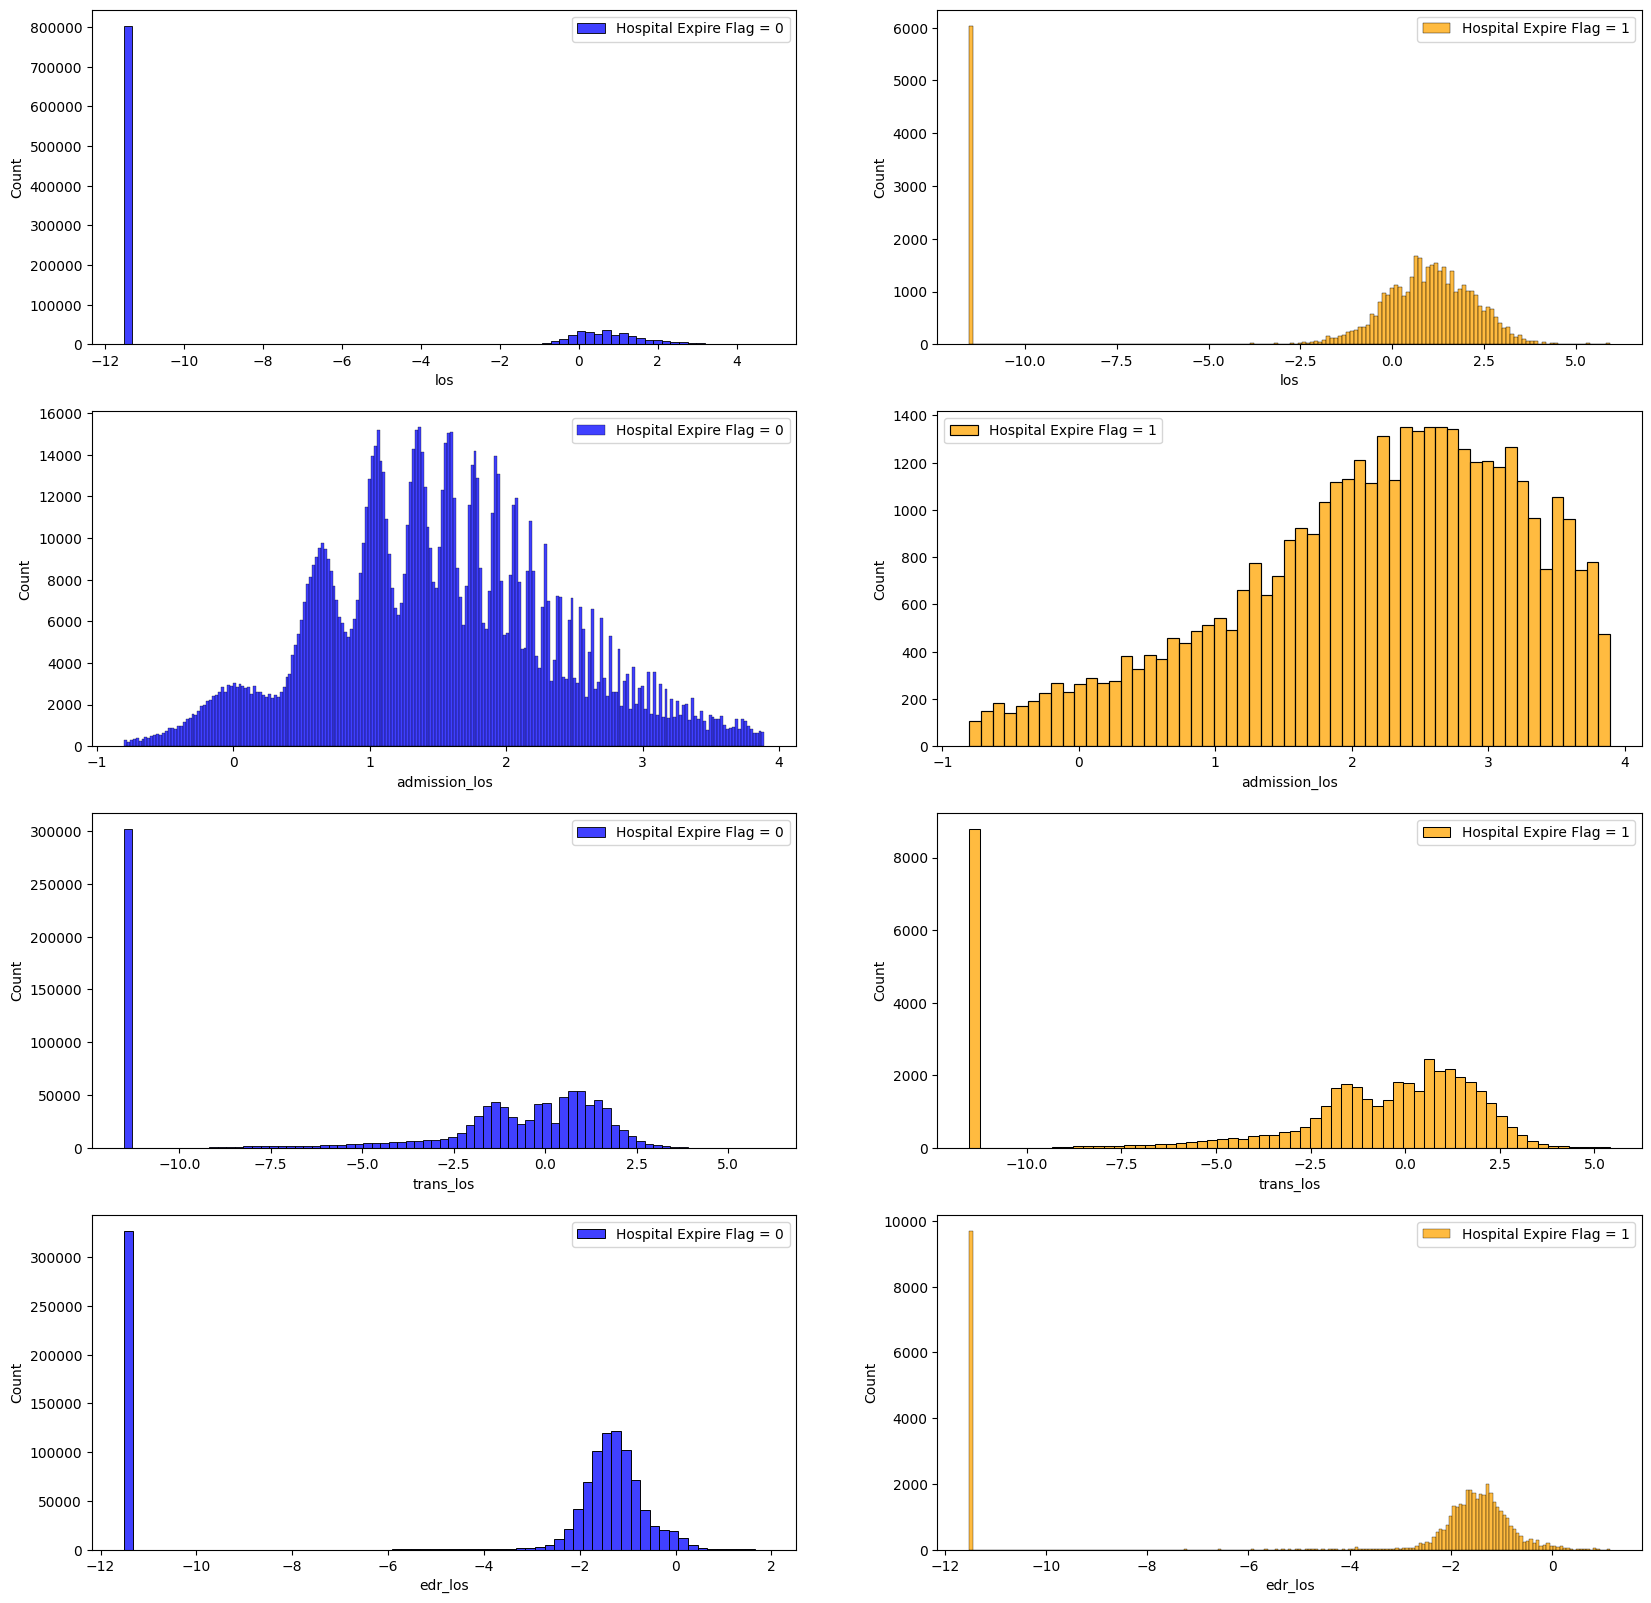

In [ ]:
num_col = ["los", "admission_los", "trans_los", "edr_los"]

plt.figure(figsize=(20, 20))

for i in range(len(num_col)):
    plt.subplot(4, 2, 2*i+1)  # 4 rows, 2 columns
    # 로그 변환
    df[num_col[i]] = np.log(df[num_col[i]] + 0.00001)
    # 이상치 제거 (Hospital Expire Flag = 0)
    data_no_outliers_0 = df[(df["hospital_expire_flag"] == 0) & (df[num_col[i]] <= df[num_col[i]].quantile(0.75) + 1.5 * (df[num_col[i]].quantile(0.75) - df[num_col[i]].quantile(0.25))) & (df[num_col[i]] >= df[num_col[i]].quantile(0.25) - 1.5 * (df[num_col[i]].quantile(0.75) - df[num_col[i]].quantile(0.25)))]
    sns.histplot(x=num_col[i], data=data_no_outliers_0, color='blue', label='Hospital Expire Flag = 0')
    plt.legend()

    plt.subplot(4, 2, 2*i+2)
    # 이상치 제거 (Hospital Expire Flag = 1)
    data_no_outliers_1 = df[(df["hospital_expire_flag"] == 1) & (df[num_col[i]] <= df[num_col[i]].quantile(0.75) + 1.5 * (df[num_col[i]].quantile(0.75) - df[num_col[i]].quantile(0.25))) & (df[num_col[i]] >= df[num_col[i]].quantile(0.25) - 1.5 * (df[num_col[i]].quantile(0.75) - df[num_col[i]].quantile(0.25)))]
    sns.histplot(x=num_col[i], data=data_no_outliers_1, color='orange', label='Hospital Expire Flag = 1')
    plt.legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


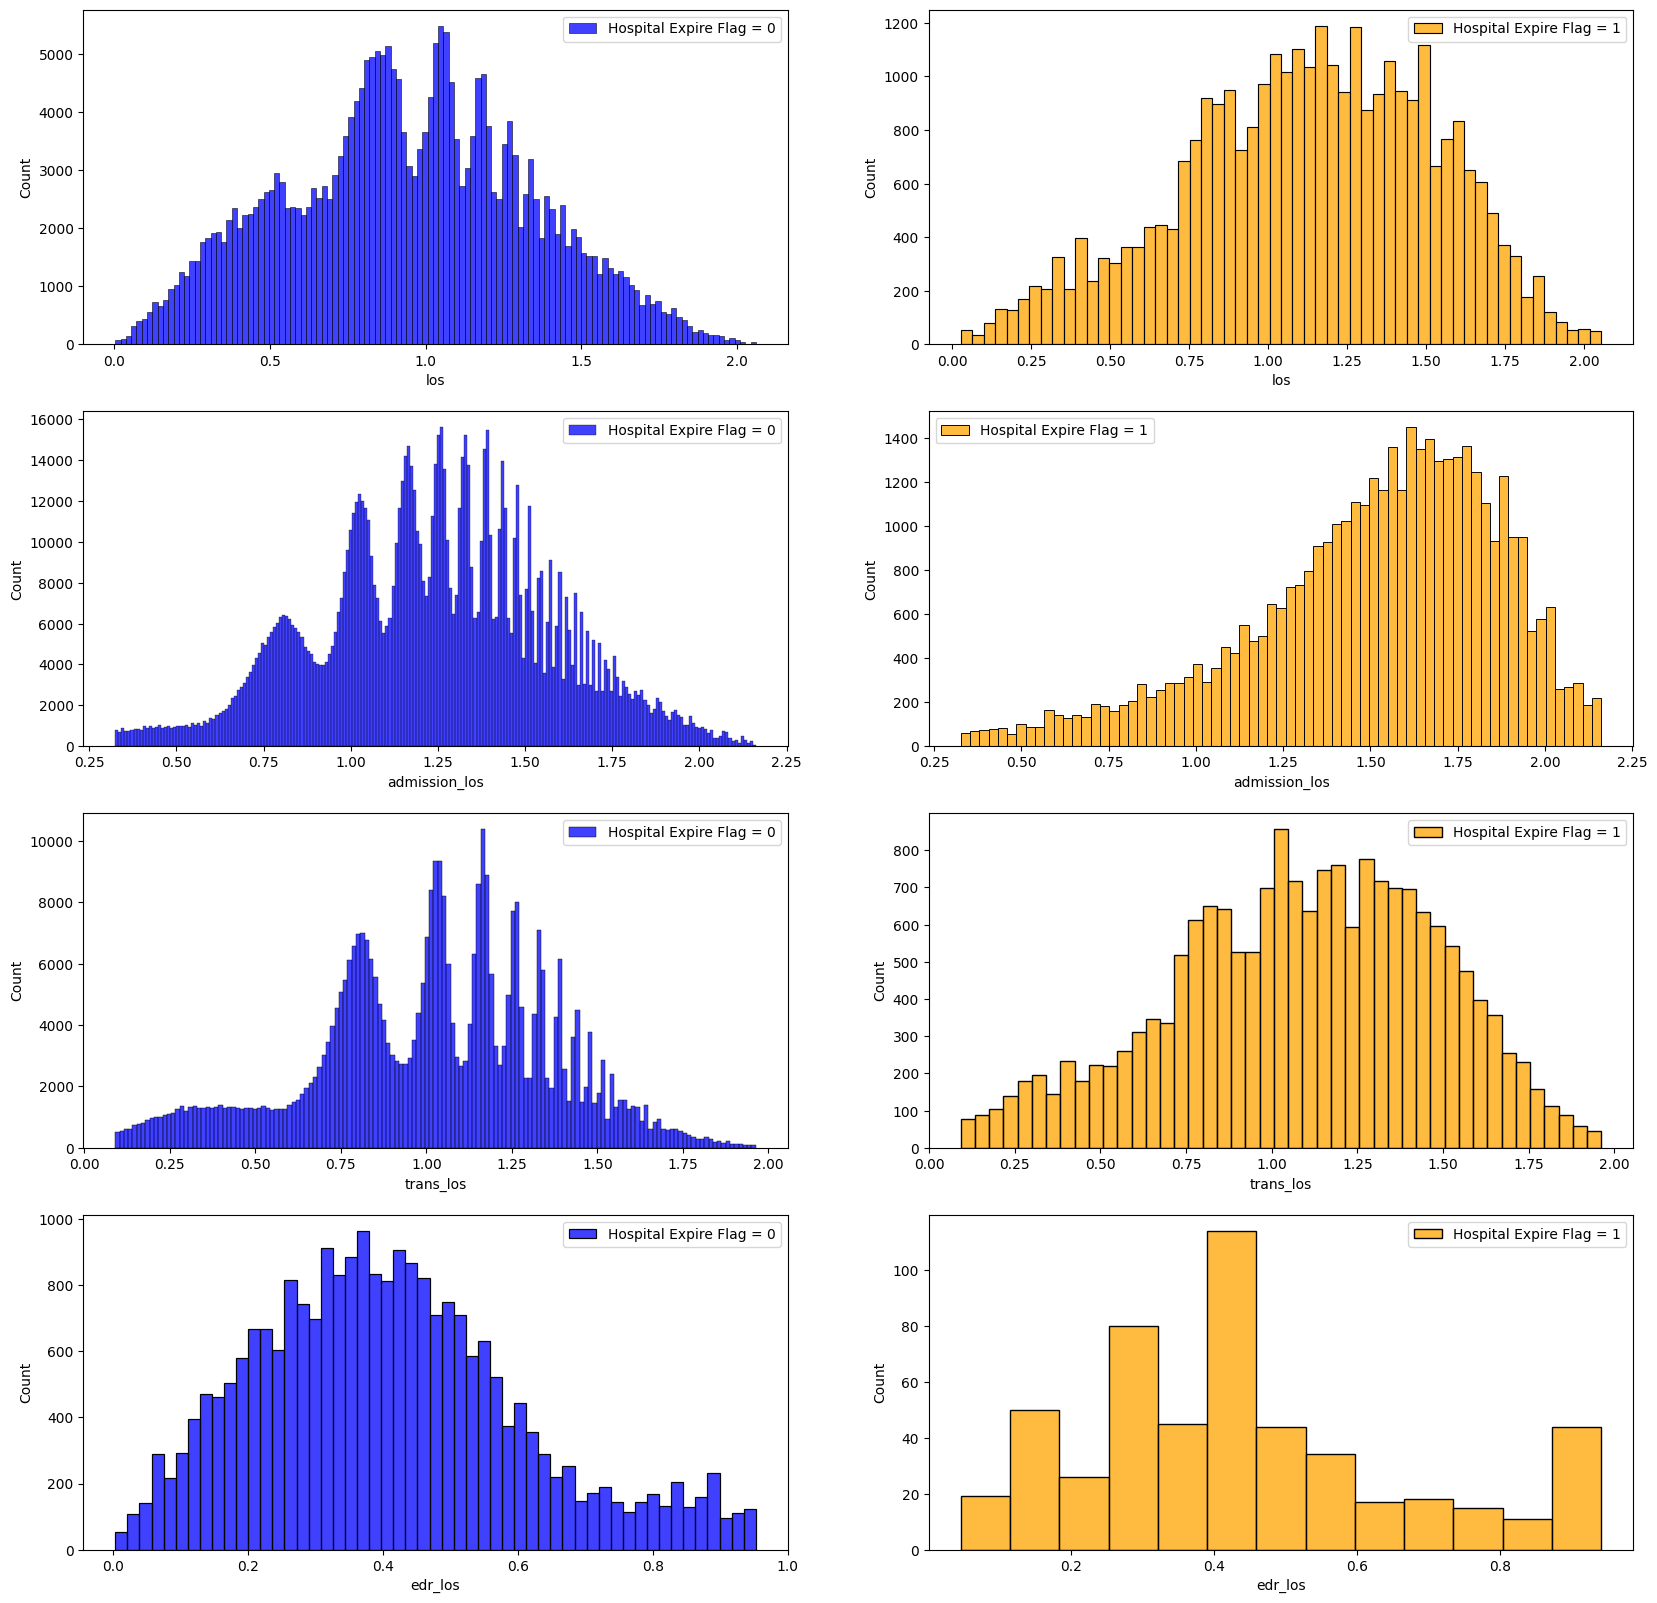

In [ ]:
num_col = ["los", "admission_los", "trans_los", "edr_los"]

plt.figure(figsize=(20, 20))

for i in range(len(num_col)):
    plt.subplot(4, 2, 2*i+1)  # 4 rows, 2 columns
    # 제곱근
    df[num_col[i]] = np.sqrt(df[num_col[i]])
    # 이상치 제거 (Hospital Expire Flag = 0)
    data_no_outliers_0 = df[(df["hospital_expire_flag"] == 0) & (df[num_col[i]] <= df[num_col[i]].quantile(0.75) + 1.5 * (df[num_col[i]].quantile(0.75) - df[num_col[i]].quantile(0.25))) & (df[num_col[i]] >= df[num_col[i]].quantile(0.25) - 1.5 * (df[num_col[i]].quantile(0.75) - df[num_col[i]].quantile(0.25)))]
    sns.histplot(x=num_col[i], data=data_no_outliers_0, color='blue', label='Hospital Expire Flag = 0')
    plt.legend()

    plt.subplot(4, 2, 2*i+2)
    # 이상치 제거 (Hospital Expire Flag = 1)
    data_no_outliers_1 = df[(df["hospital_expire_flag"] == 1) & (df[num_col[i]] <= df[num_col[i]].quantile(0.75) + 1.5 * (df[num_col[i]].quantile(0.75) - df[num_col[i]].quantile(0.25))) & (df[num_col[i]] >= df[num_col[i]].quantile(0.25) - 1.5 * (df[num_col[i]].quantile(0.75) - df[num_col[i]].quantile(0.25)))]
    sns.histplot(x=num_col[i], data=data_no_outliers_1, color='orange', label='Hospital Expire Flag = 1')
    plt.legend()

plt.show()

In [ ]:
num_col = ["los", "admission_los", "trans_los", "edr_los"]

# num_col에 해당하는 컬럼의 각 분위수를 구하고 이를 기반으로 이산화
for col in num_col:
    Q1 = df_null[col].quantile(0.25)
    Q2 = df_null[col].quantile(0.50)
    Q3 = df_null[col].quantile(0.75)
    Q4 = df_null[col].quantile(1.00)

    # 4개의 구간으로 나눔: Q1 이하, Q1 ~ Q2, Q2 ~ Q3, Q3 이상
    df_null[col] = np.select([df_null[col] <= Q1,
                                          (df_null[col] > Q1) & (df_null[col] <= Q2),
                                          (df_null[col] > Q2) & (df_null[col] <= Q3),
                                          df_null[col] > Q3],
                                         ["1", "2", "3", "4"]
                                         )

In [ ]:
df_null[num_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1110803 entries, 0 to 1110935
Data columns (total 4 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   los            1110803 non-null  object
 1   admission_los  1110803 non-null  object
 2   trans_los      1110803 non-null  object
 3   edr_los        1110803 non-null  object
dtypes: object(4)
memory usage: 42.4+ MB


# **fillna**

In [ ]:
df_null = df_null.fillna(0)

In [ ]:
df_null.head(10)

,hadm_id,hospital_expire_flag,anchor_age,drg_severity,% Hemoglobin A1c,24 hr Calcium,24 hr Creatinine,24 hr Protein,25-OH Vitamin D,<Albumin>,...,admission_los_3,admission_los_4,trans_los_1,trans_los_2,trans_los_3,trans_los_4,edr_los_1,edr_los_2,edr_los_3,edr_los_4
0,24067979,0,33,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
1,24067979,0,33,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,0
2,24067979,0,33,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0
3,24459786,0,70,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0
4,24459786,0,70,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,0,0
5,28496347,0,70,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,1,0
6,28496347,0,70,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,1,0
7,28496347,0,70,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,1,0,0,1,0
8,27495024,0,70,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,0,0,0,0,0,1,0
9,27495024,0,70,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,1,0


# **Encoding**

In [ ]:
# Select categorical columns
cat_col = df_null.select_dtypes(include=['object']).columns

# Use get_dummies to one-hot encode categorical variables
df_null = pd.get_dummies(df_null, columns=cat_col)

# Oversampling

In [ ]:
seed = 21
# df_null_filtered

In [ ]:
x = df_final.drop(['hospital_expire_flag'], axis=1)
y = df_final['hospital_expire_flag']

In [ ]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, stratify=y, random_state=seed)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, stratify=y_temp,test_size=2/3, random_state=seed)

In [ ]:
# oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=seed)
x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)

# 결과 출력 함수

In [ ]:
def print_results(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    matrix = confusion_matrix(y_true, y_pred)

    print("Accuracy: {:.2f}".format(accuracy))
    print("Recall: {:.2f}".format(recall))
    print("Precision: {:.2f}".format(precision))
    print("F1-Score: {:.2f}".format(f1))
    print("Confusion Matrix:\n", matrix)
    print("\n")

# decision tree

## Oversampling x

### optim

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import time

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=seed)

In [ ]:
# Grid Search에 사용될 하이퍼파라미터 그리드 정의
param_grid = {
    'max_depth': [6, 8, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [ ]:
# Grid Search 객체 초기화
grid = GridSearchCV(estimator=dt_clf, param_grid=param_grid, scoring='f1', cv=5)

In [ ]:
# Grid Search 수행
grid_result = grid.fit(x_train, y_train)

In [ ]:
# 최적의 하이퍼파라미터 출력
print("Best Parameters: ", grid_result.best_params_)

# 검증 세트에서 모델 성능 평가 (F1-score)
y_pred = grid_result.best_estimator_.predict(x_val)
f1 = f1_score(y_val, y_pred)
print("F1-score on Test Set: {:.2f}".format(f1))

In [ ]:
print_results(y_test, y_pred)

### baseline

In [ ]:
# no oversampling
dt_clf = DecisionTreeClassifier(random_state=seed)

# 시작 시간 기록
start_time = time.time()

dt_clf.fit(x_train, y_train)

# 종료 시간 기록
end_time = time.time()

# 학습 시간 계산
training_time = end_time - start_time

print(f"Training Time: {training_time} seconds")

start_time = time.time()

y_pred = dt_clf.predict(x_test)

end_time = time.time()

# 추론 시간 계산
infer_time = end_time - start_time

print(f"Infer Time: {infer_time} seconds")

print_results(y_test, y_pred)

Training Time: 281.2165775299072 seconds
Accuracy: 1.00
Recall: 0.99
Precision: 0.99
F1-Score: 0.99
Confusion Matrix:
 [[320127    144]
 [   166  12804]]




## **feature importance**

In [ ]:
# 상위 5개 뽑기
feature_importances = dt_clf.feature_importances_

# 훈련 데이터의 컬럼명을 가져옵니다.
feature_names = x_train.columns

# 중요도가 높은 순으로 feature의 인덱스를 정렬합니다.
indices = sorted(range(len(feature_importances)), key=lambda k: feature_importances[k], reverse=True)

# 중요도가 높은 순으로 feature의 이름과 중요도를 출력합니다.
for f in range(len(feature_importances)):
    print(f"{f+1}. Feature '{feature_names[indices[f]]}': {feature_importances[indices[f]]}")

1. Feature 'drg_severity': 0.0976042846294134
2. Feature 'Lactate': 0.09706634367438288
3. Feature 'Bicarbonate': 0.04443301358427913
4. Feature 'Temperature': 0.029149348839534437
5. Feature 'anchor_age': 0.021385353345888584
6. Feature 'White Blood Cells': 0.01878718369737247
7. Feature 'pCO2': 0.018303442828591966
8. Feature 'Nucleated Red Cells': 0.017303608100832642
9. Feature 'Phosphate': 0.017165831648425584
10. Feature 'Platelet Count': 0.01638925951268159
11. Feature 'Anion Gap': 0.015318653699493905
12. Feature 'Sodium': 0.01417448914088576
13. Feature 'Potassium': 0.012538908277683647
14. Feature 'Lactate Dehydrogenase (LD)': 0.012453053203912733
15. Feature 'PTT': 0.011661900147389995
16. Feature 'admission_los_1': 0.01152232119451624
17. Feature 'Bilirubin, Total': 0.011136144950286307
18. Feature 'INR(PT)': 0.010641158352459254
19. Feature 'Neutrophils': 0.009888276222887108
20. Feature 'PT': 0.009595520743568455
21. Feature 'Chloride': 0.009489028480495088
22. Feature 'R

In [ ]:
# feature 중요도를 얻습니다.
feature_importances = dt_clf.feature_importances_

# 훈련 데이터의 컬럼명을 가져옵니다.
feature_names = x_train.columns

feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

zero_features = feature_importances_df[feature_importances_df['Importance'] > 0]['Feature']

df_null_filtered = df_null[zero_features]

## **Oversampling**

### optim

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=seed)

In [ ]:
# Grid Search에 사용될 하이퍼파라미터 그리드 정의
param_grid = {
    'max_depth': [6, 8, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [ ]:
# Grid Search 객체 초기화
grid = GridSearchCV(estimator=dt_clf, param_grid=param_grid, scoring='f1', cv=5)

In [ ]:
# Grid Search 수행
grid_result = grid.fit(x_train_ros, y_train_ros)

In [ ]:
# 최적의 하이퍼파라미터 출력
print("Best Parameters: ", grid_result.best_params_)

# 검증 세트에서 모델 성능 평가 (F1-score)
y_pred = grid_result.best_estimator_.predict(x_val)
f1 = f1_score(y_val, y_pred)
print("F1-score on Test Set: {:.2f}".format(f1))

In [ ]:
print_results(y_test, y_pred)

### baseline

In [ ]:
# Train Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=seed, max_depth=10)
dt_clf.fit(x_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=10, random_state=21)

In [ ]:
y_pred = dt_clf.predict(x_test)

In [ ]:
print_results(y_test, y_pred)

Accuracy: 0.90
Recall: 0.93
Precision: 0.26
F1-Score: 0.41
Confusion Matrix:
 [[286399  33872]
 [   864  12106]]




In [ ]:
# feature 중요도를 얻습니다.
feature_importances = dt_clf.feature_importances_

# 훈련 데이터의 컬럼명을 가져옵니다.
feature_names = x_train.columns

# 중요도가 높은 순으로 feature의 인덱스를 정렬합니다.
indices = sorted(range(len(feature_importances)), key=lambda k: feature_importances[k], reverse=True)

# 중요도가 높은 순으로 feature의 이름과 중요도를 출력합니다.
for f in range(len(feature_importances)):
    print(f"{f+1}. Feature '{feature_names[indices[f]]}': {feature_importances[indices[f]]}")

# 중요도를 시각화합니다.
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in indices], rotation=45)
plt.xlabel("Feature Name")
plt.ylabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

## **tree**

In [ ]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names = ['False','True'], feature_names = list(x.columns), impurity=True, filled=True)

In [ ]:
print('[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)
graph.render(filename='tree', format='png', view=True)

[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.488382 to fit


'tree.png'

# XGBoost

## Oversampling x

### optim

In [ ]:
import xgboost as xgb
import time

In [ ]:
xgb_clf = xgb.XGBClassifier(random_state=seed)

In [ ]:
# Grid Search에 사용될 하이퍼파라미터 그리드 정의
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [4, 5, 6, 7],
    'n_estimators': [50, 100, 200],
}

In [ ]:
# Grid Search 객체 초기화
grid = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='f1', cv=5)

In [ ]:
# Grid Search 수행
grid_result = grid.fit(x_train, y_train)

In [ ]:
# 최적의 하이퍼파라미터 출력
print("Best Parameters: ", grid_result.best_params_)

# 검증 세트에서 모델 성능 평가 (F1-score)
y_pred = grid_result.best_estimator_.predict(x_val)
f1 = f1_score(y_val, y_pred)
print("F1-score on Test Set: {:.2f}".format(f1))

In [ ]:
print_results(y_test, y_pred)

### baseline

In [ ]:

# no oversampling
xgb_clf = xgb.XGBClassifier(random_state=seed)

# 시작 시간 기록
start_time = time.time()

xgb_clf.fit(x_train, y_train)

# 종료 시간 기록
end_time = time.time()

# 학습 시간 계산
training_time = end_time - start_time

print(f"Training Time: {training_time} seconds")

start_time = time.time()

y_pred = xgb_clf.predict(x_test)

end_time = time.time()

# 추론 시간 계산
infer_time = end_time - start_time

print(f"Infer Time: {infer_time} seconds")
print_results(y_test, y_pred)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=0, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

## **feature importance**

In [ ]:
# feature 중요도를 얻습니다.
feature_importances = xgb_clf.feature_importances_

# 훈련 데이터의 컬럼명을 가져옵니다.
feature_names = x_train.columns

# 중요도가 높은 순으로 feature의 인덱스를 정렬합니다.
indices = sorted(range(len(feature_importances)), key=lambda k: feature_importances[k], reverse=True)

# 중요도가 높은 순으로 feature의 이름과 중요도를 출력합니다.
for f in range(5):
    print(f"{f+1}. Feature '{feature_names[indices[f]]}': {feature_importances[indices[f]]}")

# 중요도를 시각화합니다.
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in indices], rotation=45)
plt.xlabel("Feature Name")
plt.ylabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

## Oversampling

### optim

In [ ]:
xgb_clf = xgb.XGBClassifier(random_state=seed)

In [ ]:
# Grid Search에 사용될 하이퍼파라미터 그리드 정의
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [4, 5, 6, 7],
    'n_estimators': [50, 100, 200],
}

In [ ]:
# Grid Search 객체 초기화
grid = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='f1', cv=5)

In [ ]:
# Grid Search 수행
grid_result = grid.fit(x_train_ros, y_train_ros)

In [ ]:
# 최적의 하이퍼파라미터 출력
print("Best Parameters: ", grid_result.best_params_)

# 검증 세트에서 모델 성능 평가 (F1-score)
y_pred = grid_result.best_estimator_.predict(x_val)
f1 = f1_score(y_val, y_pred)
print("F1-score on Test Set: {:.2f}".format(f1))

In [ ]:
print_results(y_test, y_pred)

### baseline

In [ ]:
# Train Decision Tree Classifier
xgb_clf = xgb.XGBClassifier(random_state=seed)
xgb_clf.fit(x_train_ros, y_train_ros)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=0, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgb_clf.predict(x_test)

In [ ]:
print_results(y_test, y_pred)

Accuracy: 0.98
Recall: 0.85
Precision: 0.98
F1-Score: 0.91
Confusion Matrix:
 [[314327    706]
 [  5386  30856]]




# TabNet

In [ ]:
!pip install pytorch_tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.5 MB/s eta 0:00:00


In [ ]:
seed=21

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import scipy
import gc
import joblib

from tqdm import tqdm
from typing import Any, Dict

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.pretraining import TabNetPretrainer

from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.utils import resample, shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
def conf_matrix(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    mat = confusion_matrix(y_true, y_pred)
    labels = ['0(Non-Died)', '1(Died)']
    colors=['whitesmoke', 'steelblue']
    sns.heatmap(mat, annot=True, cmap=colors, xticklabels=labels, yticklabels=labels, fmt="d")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print('Accuracy:', acc)
    print('Recall:', recall)
    print('Precision:', precision)
    print('F1:', f1)

In [ ]:
def seed_everything(seed = 21):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything()

In [ ]:
x = df_final.drop(['hospital_expire_flag'], axis=1)
y = df_final['hospital_expire_flag']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, stratify=y, random_state=seed)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, stratify=y_temp,test_size=2/3, random_state=seed)

ss = StandardScaler()
x_train.iloc[:, :] = ss.fit_transform(x_train)
x_val.iloc[:, :] = ss.transform(x_val)
x_test.iloc[:, :] = ss.transform(x_test)

# oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=seed)
x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)

In [ ]:
# 메모리 최적화
sparse_X_train = scipy.sparse.csr_matrix(x_train_ros)
sparse_X_valid = scipy.sparse.csr_matrix(x_val)

In [ ]:
print(torch.cuda.is_available())

False


## **baseline**

In [ ]:
tabnet_params = {"optimizer_fn": torch.optim.Adam,
                 "optimizer_params": dict(lr=1e-3, weight_decay=1e-2),
                 "scheduler_fn": torch.optim.lr_scheduler.StepLR,
                 "scheduler_params":{"step_size":10, "gamma":0.99},
                 "mask_type": 'sparsemax',
                 "device_name": 'cuda',
                 "n_d": 8,
                 "n_a": 8,
                 "n_steps": 3,
                 "gamma": 1.3,
                 "seed": 21}

tabnet = TabNetClassifier(**tabnet_params)

max_epochs = 5

# Fitting the model
tabnet.fit(X_train=sparse_X_train, y_train=y_train_ros,
           eval_set=[(sparse_X_train, y_train_ros), (sparse_X_valid, y_val)],
           eval_name=['train', 'val'],
           eval_metric=['accuracy', 'logloss'],
           max_epochs=max_epochs,
           patience=50,
           batch_size=1024,
           virtual_batch_size=256,  # 고스트 BN
)

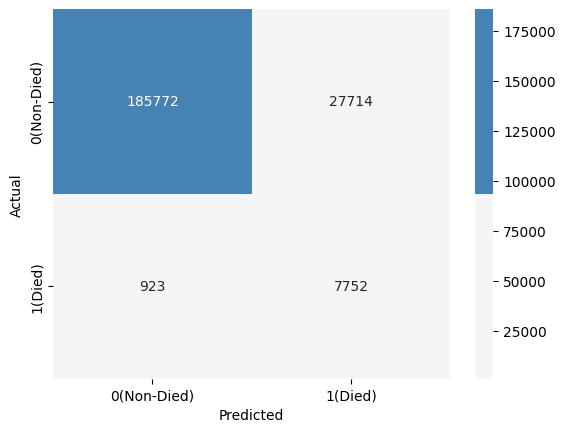

Accuracy: 0.871097987495555
Recall: 0.8936023054755043
Precision: 0.21857553713415664
F1: 0.35123807797739065
Infer Time: 12.492587089538574 seconds


In [ ]:
# test time 측정
start_time = time.time()
preds = tabnet.predict(x_test.values)
end_time = time.time()

conf_matrix(y_test, preds)

infer_time = end_time - start_time
print(f"Infer Time: {infer_time} seconds")

## **optim**

In [ ]:
# optuna objective
def objective(trial):
    n_d_a = trial.suggest_int('n_d_a', 8, 64)
    n_steps = trial.suggest_int('n_steps', 3, 10)
    gamma = trial.suggest_float('gamma', 1.0, 2.0)
    lr = trial.suggest_float('lr', 1e-5, 1e-2)
    cat_emb_dim = trial.suggest_int('cat_emb_dim', 1, 4)

    tabnet_params = {"cat_idxs": cat_column_index,
                     "cat_dims": cat_cardinalities,
                     "cat_emb_dim": 2,
                     "optimizer_fn": torch.optim.Adam,
                     "optimizer_params": dict(lr=lr),
                     "scheduler_fn": None,
                     "mask_type": 'sparsemax',
                     "device_name": 'cuda',
                     "n_d": n_d_a,
                     "n_a": n_d_a,
                     "n_steps": n_steps,
                     "gamma": gamma,
                     "verbose": 0,
                     "seed": 21}

    clf = TabNetClassifier(**tabnet_params)

    max_epochs = 50

    # Fitting the model
    clf.fit(X_train=sparse_X_train, y_train=y['train'],
            eval_set=[(sparse_X_train, y['train']), (sparse_X_valid, y['val'])],
            eval_name=['train', 'val'],
            eval_metric=['accuracy', 'logloss'],
            max_epochs=max_epochs,
            batch_size=1024,
            virtual_batch_size=128,)

    # return minimun loss
    return clf.best_cost

In [ ]:
tabnet = optuna.create_study(study_name='TabNet', direction='minimize', sampler=TPESampler(seed=21))
tabnet.optimize(lambda trial: objective(trial), n_trials=50)

epoch 0  | loss: 0.43274 | train_accuracy: 0.89117 | train_logloss: 0.27821 | val_accuracy: 0.87144 | val_logloss: 0.28616 |  0:05:53s
epoch 1  | loss: 0.22803 | train_accuracy: 0.92178 | train_logloss: 0.20853 | val_accuracy: 0.91685 | val_logloss: 0.20212 |  0:11:49s
epoch 2  | loss: 0.19099 | train_accuracy: 0.9242  | train_logloss: 0.20955 | val_accuracy: 0.90824 | val_logloss: 0.23241 |  0:17:36s
epoch 3  | loss: 0.18439 | train_accuracy: 0.92775 | train_logloss: 0.2013  | val_accuracy: 0.91421 | val_logloss: 0.21374 |  0:23:23s
epoch 4  | loss: 0.18393 | train_accuracy: 0.92916 | train_logloss: 0.19676 | val_accuracy: 0.91871 | val_logloss: 0.20131 |  0:29:11s
epoch 5  | loss: 0.18306 | train_accuracy: 0.93372 | train_logloss: 0.18938 | val_accuracy: 0.92321 | val_logloss: 0.1949  |  0:35:01s
epoch 6  | loss: 0.18318 | train_accuracy: 0.93084 | train_logloss: 0.19476 | val_accuracy: 0.9079  | val_logloss: 0.22787 |  0:40:50s
epoch 7  | loss: 0.1829  | train_accuracy: 0.92692 | tr

In [ ]:
num_params = sum(dict((p.data_ptr(), p.numel()) for p in tabnet.network.parameters()).values())
print(num_params)

28088


In [ ]:
print(sum(p.numel() for p in tabnet.network.parameters() if p.requires_grad))

28088


## **plot**

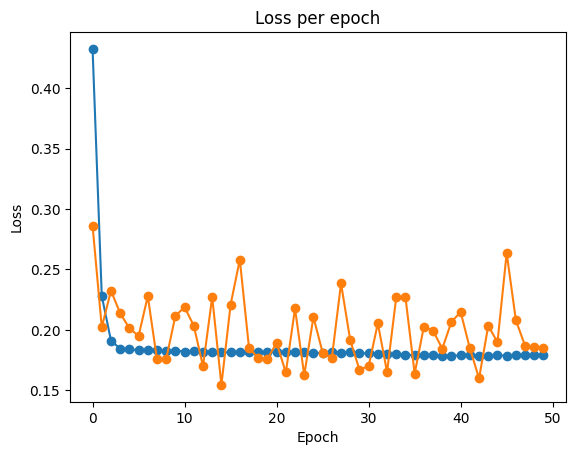

In [ ]:
# plot loss
plt.plot(tabnet.history['loss'], marker='o', label='train')
plt.plot(tabnet.history['val_logloss'], marker='o', label='val')
plt.title('Loss per epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

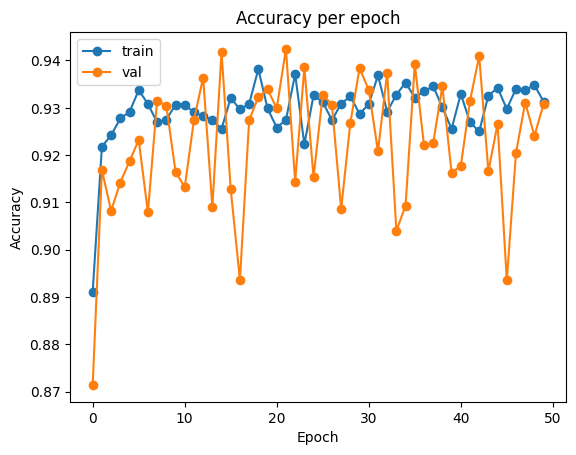

In [ ]:
# plot accuracy
plt.plot(tabnet.history['train_accuracy'], label='train', marker='o')
plt.plot(tabnet.history['val_accuracy'], label='val', marker='o')
plt.title('Accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

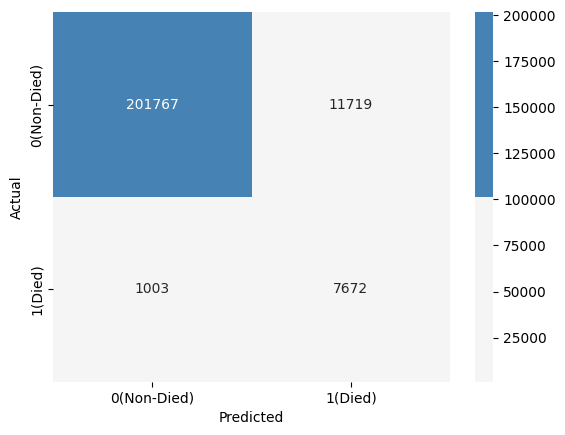

Accuracy: 0.9427352235540891
Recall: 0.8843804034582132
Precision: 0.3956474653189624
F1: 0.5467113233093422


In [ ]:
preds = tabnet.predict(x_test.values)

conf_matrix(y_test, preds)

# **MLP**

In [ ]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, stratify=y, random_state=seed)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, stratify=y_temp,test_size=2/3, random_state=seed)

In [ ]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, stratify=y, random_state=seed)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, stratify=y_temp, test_size=2/3, random_state=seed)

# oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=seed)
x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)

In [ ]:
def model_train(model, data_loader, criterion, optimizer, device, history, scheduler=None):
    model.train()
    running_loss = 0
    corr = 0

    for data, label in tqdm(data_loader):
        optimizer.zero_grad()

        data, label = data.to(device), label.to(device)
        output = model(data)
        output = torch.sigmoid(output)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        pred = output >= torch.FloatTensor([0.5]).to(device)
        corr += pred.eq(label).sum().item()
        running_loss += loss.item() * data.size(0)

    if scheduler:
        scheduler.step()

    # Average accuracy & loss
    accuracy = corr / len(data_loader.dataset)
    loss = running_loss / len(data_loader.dataset)
    history['train_loss'].append(loss)
    history['train_accuracy'].append(accuracy)

    return loss, accuracy, history

def model_evaluate(model, data_loader, criterion, device, history):
    model.eval()
    with torch.no_grad():
        running_loss = 0
        corr = 0

        for data, label in data_loader:
            data, label = data.to(device), label.to(device)
            output = model(data)
            output = torch.sigmoid(output)

            pred = output >= torch.FloatTensor([0.5]).to(device)
            corr += pred.eq(label).sum().item()
            running_loss += criterion(output, label).item() * data.size(0)

        accuracy = corr / len(data_loader.dataset)
        loss = running_loss / len(data_loader.dataset)
        history['val_loss'].append(loss)
        history['val_accuracy'].append(accuracy)

        return loss, accuracy, history

def plot_loss(history):
    plt.plot(history['train_loss'], label='train', marker='o')
    plt.plot(history['val_loss'], label='val', marker='o')
    plt.title('Loss per epoch')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()

def plot_acc(history):
    plt.plot(history['train_accuracy'], label='train', marker='o')
    plt.plot(history['val_accuracy'], label='val',  marker='o')
    plt.title('Accuracy per epoch')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()

In [ ]:
# n_features : X_train.shape[1]
n_features = x_train.shape[1]

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.bn1 = nn.BatchNorm1d(32)
        self.bn2 = nn.BatchNorm1d(16)
        self.bn3 = nn.BatchNorm1d(8)
        self.fc1 = nn.Linear(n_features, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 8)
        self.fc4 = nn.Linear(8, 1)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = F.relu(self.bn2(self.fc2(x)))
        x = F.relu(self.bn3(self.fc3(x)))

        x = self.fc4(x)
        return x

# device = 'cuda' # if colab gpu
device = 'cuda'  # Use CPU

# to(device) : use gpu
model = MLP().to(device)

In [ ]:
total_params = sum(p.numel() for p in model.parameters())
print(f"총 매개변수 수: {total_params}")

총 매개변수 수: 11697


In [ ]:
class TensorData(Dataset):
    def __init__(self, data, label):
        self.data = data
        self.label = label
        self.len = self.label.shape[0]

    def __getitem__(self, index):
        return self.data[index], self.label[index]

    def __len__(self):
        return self.len

In [ ]:
train_dataset = TensorData(torch.tensor(x_train_ros.values, dtype=torch.float), torch.tensor(y_train_ros.values.reshape(-1, 1), dtype=torch.float))
val_dataset = TensorData(torch.tensor(x_val.values, dtype=torch.float), torch.tensor(y_val.values.reshape(-1, 1), dtype=torch.float))
test_dataset = TensorData(torch.tensor(x_test.values, dtype=torch.float), torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float))

train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1024, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=True)

## **baseline**

In [ ]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr = 1e-3, weight_decay=1e-2) # lr, weight_decay, scheduler 모두 임의로 설정
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.99)

history = {'train_loss' : [],
           'val_loss': [],
           'train_accuracy': [],
           'val_accuracy': []}

device = 'cpu' # if colab, else 'cpu'
EPOCHS = 5 # 임의로 설정
max_loss = np.inf

for epoch in range(EPOCHS):
    train_loss, train_acc, history = model_train(model, train_loader, criterion, optimizer, device, history, scheduler)
    val_loss, val_acc, history = model_evaluate(model, val_loader, criterion, device, history)

    if val_loss < max_loss:
        print(f'[INFO] val_loss has been improved from {max_loss:.5f} to {val_loss:.5f}. Save model.')
        max_loss = val_loss
        torch.save(model.state_dict(), 'MLP_Best.pth')

    print(f'epoch {epoch+1:02d}, loss: {train_loss:.5f}, accuracy: {train_acc:.5f}, val_loss: {val_loss:.5f}, val_accuracy: {val_acc:.5f} \n')

100%|██████████| 1460/1460 [00:40<00:00, 36.27it/s]


[INFO] val_loss has been improved from inf to 1.24997. Save model.
epoch 01, loss: 0.53033, accuracy: 0.74244, val_loss: 1.24997, val_accuracy: 0.60828 



Infer Time: 0.3512587547302246 seconds


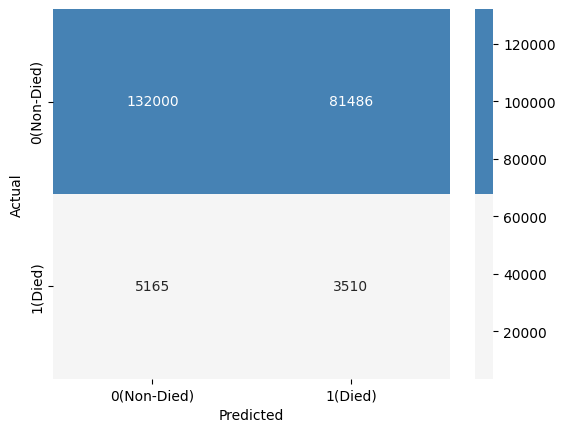

Accuracy: 0.6099630448188476
Recall: 0.4046109510086455
Precision: 0.041296060991105464
F1: 0.07494315209616638


In [ ]:
import time
model.load_state_dict(torch.load('MLP_Best.pth'))

start_time = time.time()
model.eval()

# threshold = 0.5

preds = torch.sigmoid(model(torch.tensor(x_test.values, dtype=torch.float))) >= torch.FloatTensor([0.5])
preds = np.where(preds.numpy(), 1, 0)
end_time = time.time()
# 추론 시간 계산
infer_time = end_time - start_time

print(f"Infer Time: {infer_time} seconds")
conf_matrix(y_test, preds)


In [ ]:
model.load_state_dict(torch.load('MLP_Best.pth'))
model = model.to(device) # 모델을 선택한 장치로 이동

model.eval()

x_test_tensor = torch.tensor(x_test.values, dtype=torch.float).to(device) # 데이터도 선택한 장치로 이동
x_test_tensor
# threshold = 0.5
preds = torch.sigmoid(model(x_test_tensor)) >= torch.FloatTensor([0.5]).to(device) # FloatTensor도 선택한 장치로 이동
preds = preds.cpu().numpy() # GPU에서 계산된 preds를 CPU로 이동 후 numpy 배열로 변환
preds = np.where(preds, 1, 0)

conf_matrix(y_test, preds)

## **optim**

In [ ]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr = 1e-3, weight_decay=1e-2) # lr, weight_decay, scheduler 모두 임의로 설정
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.99)

history = {'train_loss' : [],
           'val_loss': [],
           'train_accuracy': [],
           'val_accuracy': []}

device = 'cpu' # if colab, else 'cpu'
EPOCHS = 50 # 임의로 설정
max_loss = np.inf

for epoch in range(EPOCHS):
    train_loss, train_acc, history = model_train(model, train_loader, criterion, optimizer, device, history, scheduler)
    val_loss, val_acc, history = model_evaluate(model, val_loader, criterion, device, history)

    if val_loss < max_loss:
        print(f'[INFO] val_loss has been improved from {max_loss:.5f} to {val_loss:.5f}. Save model.')
        max_loss = val_loss
        torch.save(model.state_dict(), 'MLP_Best.pth')

    print(f'epoch {epoch+1:02d}, loss: {train_loss:.5f}, accuracy: {train_acc:.5f}, val_loss: {val_loss:.5f}, val_accuracy: {val_acc:.5f} \n')

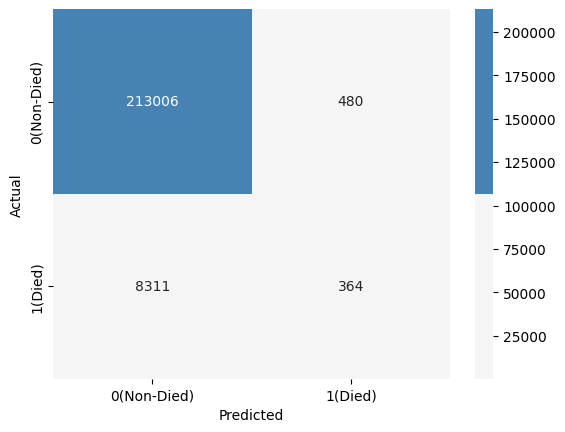

Accuracy: 0.9604295983543466
Recall: 0.04195965417867435
Precision: 0.4312796208530806
F1: 0.0764786217039605


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assuming x_test is a pandas DataFrame
x_test_tensor = torch.tensor(x_test.values, dtype=torch.float).to(device)

model = MLP().to(device)
model.load_state_dict(torch.load('MLP_Best.pth'))
model.eval()

threshold = 0.5
with torch.no_grad():
    preds = torch.sigmoid(model(x_test_tensor)) >= torch.FloatTensor([0.5]).to(device)

preds = np.where(preds.cpu().numpy(), 1, 0)

conf_matrix(y_test, preds)